<a href="https://colab.research.google.com/github/JayabharathiRavi/D19_Task_7/blob/main/Copy_of_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#trainKNN.txt
#testKNN.txt

**Importing the libraries**

In [149]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
import seaborn as sn # plotting the data

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


**Importing the dataset**

In [68]:
df_train=pd.read_csv('trainKNN.txt',header=None)
df_test=pd.read_csv('testKNN.txt',header=None)
print(df_train.head())
print(df_test.head())

   0        1      2     3     4      5     6     7    8    9   10
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1
    0        1      2     3     4      5     6      7    8     9   10
0   68  1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.0  0.17   1
1   69  1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.0  0.16   1
2   70  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03   1
3  144  1.51709  13.00  3.47  1.79  72.72  0.66   8.18  0.0  0.00   2
4  145  1.51660  12.99  3.18  1.23  72.97  0.58   8.81  0.0  0.24   2


In [69]:
Type_of_glass={1:'building_windows_float_processed',2:'building_windows_non_float_processed',3:'vehicle_windows_float_processed',
               4:'vehicle_windows_non_float_processed (none in this database)',5:'containers',6:'tableware',7:'headlamps'}

In [70]:
df_train.columns=['ID','RI','Na','Mg','Al','Si','K','Ca','Be','Fe','Type of glass']
df_train

,ID,RI,Na,Mg,Al,Si,K,Ca,Be,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [71]:
df_test.columns=['ID','RI','Na','Mg','Al','Si','K','Ca','Be','Fe','Type of glass']
df_test

,ID,RI,Na,Mg,Al,Si,K,Ca,Be,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


**Splitting the dataset into the Training set and Test set**

In [110]:
X_train = df_train[['RI','Na','Mg','Al','Si','K','Ca','Be','Fe']].values # fts
y_train = df_train['Type of glass'].values # target
X_test  = df_test[['RI','Na','Mg','Al','Si','K','Ca','Be','Fe']].values # fts
y_test  = df_test['Type of glass'].values

**Feature Scaling**

In [111]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [137]:
class_euc = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean')
class_euc.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [128]:
class_man = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
class_man.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

**Predicting the Test set results**

In [143]:
manhattan_predictions = class_man.predict(X_test)
euclid_predictions = class_euc.predict(X_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,1,1


In [144]:
y_pred_euc = class_euc.predict(X_test)
y_pred_man = class_man.predict(X_test)

**Making the Confusion Matrix**

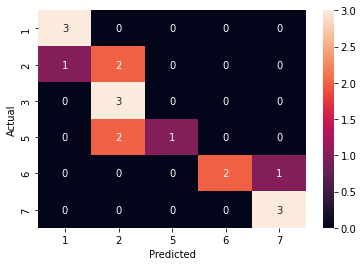

In [139]:
confusion_matrix = pd.crosstab(y_test, y_pred_euc, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

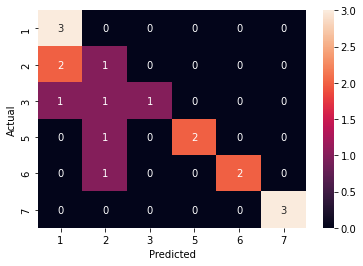

In [132]:
confusion_matrix = pd.crosstab(y_test, y_pred_man, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

**F1-score**

In [140]:
f1_score(y_test,y_pred_euc,average='micro')

0.6111111111111112

In [134]:
f1_score(y_test,y_pred_man,average='micro')

0.6666666666666666

**Accuracy**

In [141]:
ac = accuracy_score(y_test,y_pred_euc)
ac

0.6111111111111112

In [136]:
ac = accuracy_score(y_test,y_pred_man)
ac

0.6666666666666666

**Evaluation metric**

In [148]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 66.67%
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.25      0.33      0.29         3
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.79      0.67      0.68        18
weighted avg       0.79      0.67      0.68        18



Square Euclidean Accuracy: 61.11%
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
           2       0.29      0.67      0.40         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       0.75      1.00      0.86         3

    accuracy  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
